---

## **Predictive Analysis of ENEM 2022 Performance**

The Exame Nacional do Ensino Médio (ENEM) is a cornerstone in Brazil's educational system. This project delves deep into the ENEM 2022 data, aiming to unearth insights and make predictive analyses surrounding student performance, demographic influences, and other relevant factors.

### **Objective**
The core objective of this endeavor is to apply **supervised learning** techniques to predict specific outcomes based on the ENEM dataset. Depending on the chosen target variable, such as student performance or their inclination towards higher education, we might resort to:
- **Regression**: For predicting quantifiable outcomes like student scores.
- **Classification**: For categorizing students based on predetermined criteria, like the probability of pursuing higher education.

### **Motivation**
As a bedrock of societal progression, education's importance cannot be overstated. By dissecting the ENEM data, we stand to pinpoint areas in education that call for improvement, identify demographic or societal variables impacting performance, and even predict potential educational trajectories. Such insights could pave the way for informed policy decisions, curriculum enhancements, and judicious resource allocation, all striving towards a brighter future for Brazilian students.

### **Data Overview**
The data fueling this project originates from INEP's official portal and encompasses microdata from ENEM 2022.

- **Source & Citation**:
  The dataset is publicly available and sourced from the Brazilian government's official INEP (Instituto Nacional de Estudos e Pesquisas Educacionais Anísio Teixeira) portal. The specific dataset in use is the microdata from ENEM 2022.

  > INEP. (2022). Divulgados microdados do ENEM 2022. Instituto Nacional de Estudos e Pesquisas Educacionais Anísio Teixeira. [https://www.gov.br/inep/pt-br/assuntos/noticias/enem/divulgados-microdados-do-enem-2022](https://www.gov.br/inep/pt-br/assuntos/noticias/enem/divulgados-microdados-do-enem-2022)

- **Dataset Dimensions**:
  The dataset encompasses 3,476,105 entries, each spread across 30 variables, capturing facets from student demographics to their performance metrics.

---


In [230]:
# Import necessary library and reload the dataset
import pandas as pd

sample_data_filepath = r'../Week 7/DADOS/MICRODADOS_SAMPLE_ENEM.csv'
sample_data = pd.read_csv(sample_data_filepath)

# Extract key statistics from the data
num_rows, num_columns = sample_data.shape

num_rows, num_columns


(3476105, 30)

---

## **Data Cleaning & Preprocessing**

### 1. Data Cleaning Rationale:

#### a. Handling NaN Values:
- We need to inspect the dataset for any missing (NaN) values. If a feature contains a significant number of NaN values, it might be reasonable to drop the feature. Conversely, if the number of missing values is small, imputation techniques could be employed. The choice of imputation (mean, median, mode, or using models like KNN) would depend on the nature of the variable and the distribution of its data.

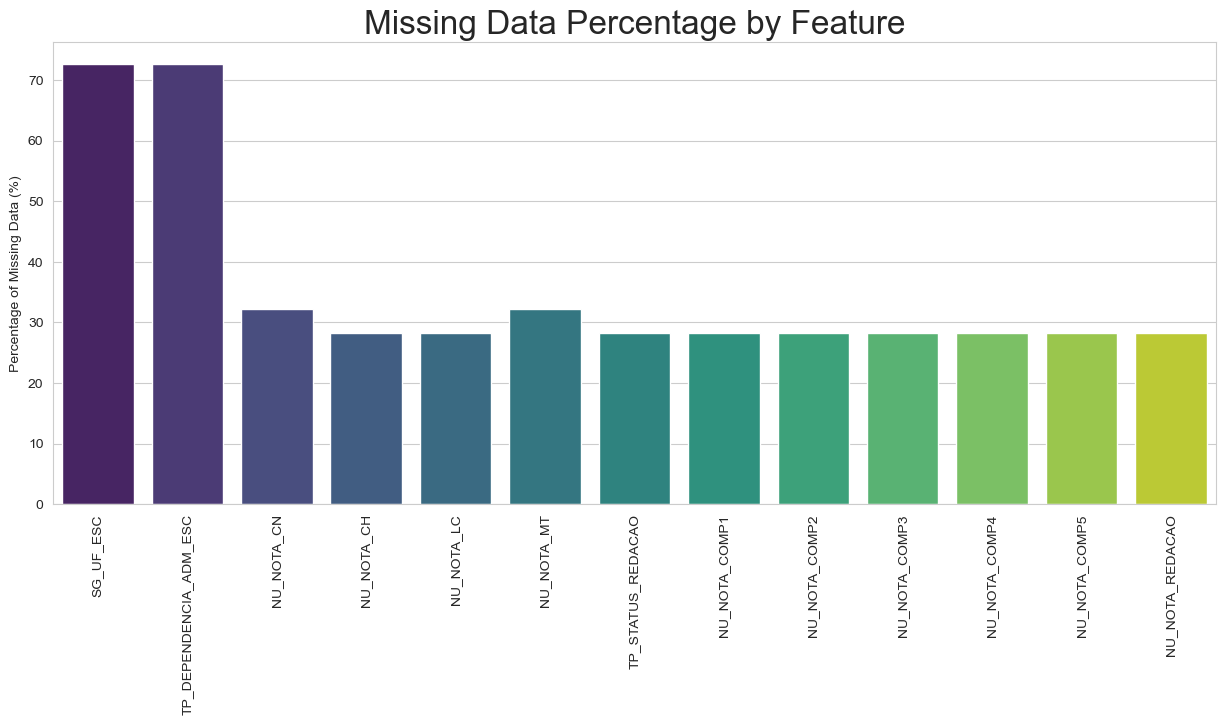

SG_UF_ESC                 72.614636
TP_DEPENDENCIA_ADM_ESC    72.614636
NU_NOTA_CN                32.240396
NU_NOTA_MT                32.240396
NU_NOTA_CH                28.269083
NU_NOTA_LC                28.269083
TP_STATUS_REDACAO         28.269083
NU_NOTA_COMP1             28.269083
NU_NOTA_COMP2             28.269083
NU_NOTA_COMP3             28.269083
dtype: float64

In [231]:
import matplotlib.pyplot as plt
import seaborn as sns

# Initial Inspection for NaN values
missing_data_percentage = (sample_data.isnull().sum() / len(sample_data)) * 100

# Filter out columns with no missing values for a concise view
missing_data_percentage = missing_data_percentage[missing_data_percentage > 0]

# Visualizing missing data
plt.figure(figsize=(15, 6))
sns.barplot(x=missing_data_percentage.index, y=missing_data_percentage.values, palette="viridis")
plt.xticks(rotation=90)
plt.ylabel("Percentage of Missing Data (%)")
plt.title("Missing Data Percentage by Feature", fontsize=24)
plt.show()

missing_data_percentage_sorted = missing_data_percentage.sort_values(ascending=False)
missing_data_percentage_sorted.head(10)  # Display top 10 columns with highest missing data percentage



##### Step 1: Handling NaN Values

1. **Dropping features with high missing data**:
   - Identify features with more than 60% missing data.
   - Drop these features from the dataset.

In [232]:
# Identify and drop features with more than 60% missing data
features_to_drop = missing_data_percentage_sorted[missing_data_percentage_sorted > 60].index
data_dropped_features = sample_data.drop(columns=features_to_drop)

# Display the features that were dropped
print('Features that were dropped:')
for item in features_to_drop.tolist():
    print(f"* {item}")


Features that were dropped:
* SG_UF_ESC
* TP_DEPENDENCIA_ADM_ESC


2. **Imputing moderate missing data**:
   - Identify features with a moderate percentage (between 0 and 60%) of missing data.
   - Choose appropriate imputation techniques based on the distribution and nature of each feature (mean, median, or mode imputation, etc.).
      - To determine the most efficient imputation method for this dataset, we first need to understand the nature of the missing data in each feature. Generally, we consider the following:
            - **Mean Imputation**: Best suited for continuous data without extreme outliers.
            - **Median Imputation**: Best suited for continuous data with extreme outliers, as it is less sensitive to them compared to the mean.
            - **Mode Imputation**: Used for categorical data to replace missing values with the most frequently occurring value.

     To decide on the most efficient method, we can follow these steps:
        1. Identify the features with a moderate amount of missing data (0-60% missing values).
        2. For each such feature, visualize the distribution of values to identify the presence of outliers and understand the data distribution.
        3. Based on the visualizations and understanding of the feature, choose the most appropriate imputation method.

In [233]:
# Identify features with moderate missing values (between 0% and 60%)
moderate_missing_values_features = missing_data_percentage_sorted[(missing_data_percentage_sorted > 0) & (missing_data_percentage_sorted <= 60)]

# Display features with moderate missing data
moderate_missing_values_features


NU_NOTA_CN           32.240396
NU_NOTA_MT           32.240396
NU_NOTA_CH           28.269083
NU_NOTA_LC           28.269083
TP_STATUS_REDACAO    28.269083
NU_NOTA_COMP1        28.269083
NU_NOTA_COMP2        28.269083
NU_NOTA_COMP3        28.269083
NU_NOTA_COMP4        28.269083
NU_NOTA_COMP5        28.269083
NU_NOTA_REDACAO      28.269083
dtype: float64

#### b. Imputation:
- For numerical features, if the missing values are minimal, we can use mean or median for imputation, based on the feature's distribution. For categorical features, mode imputation or using techniques like KNN imputation can be applied.

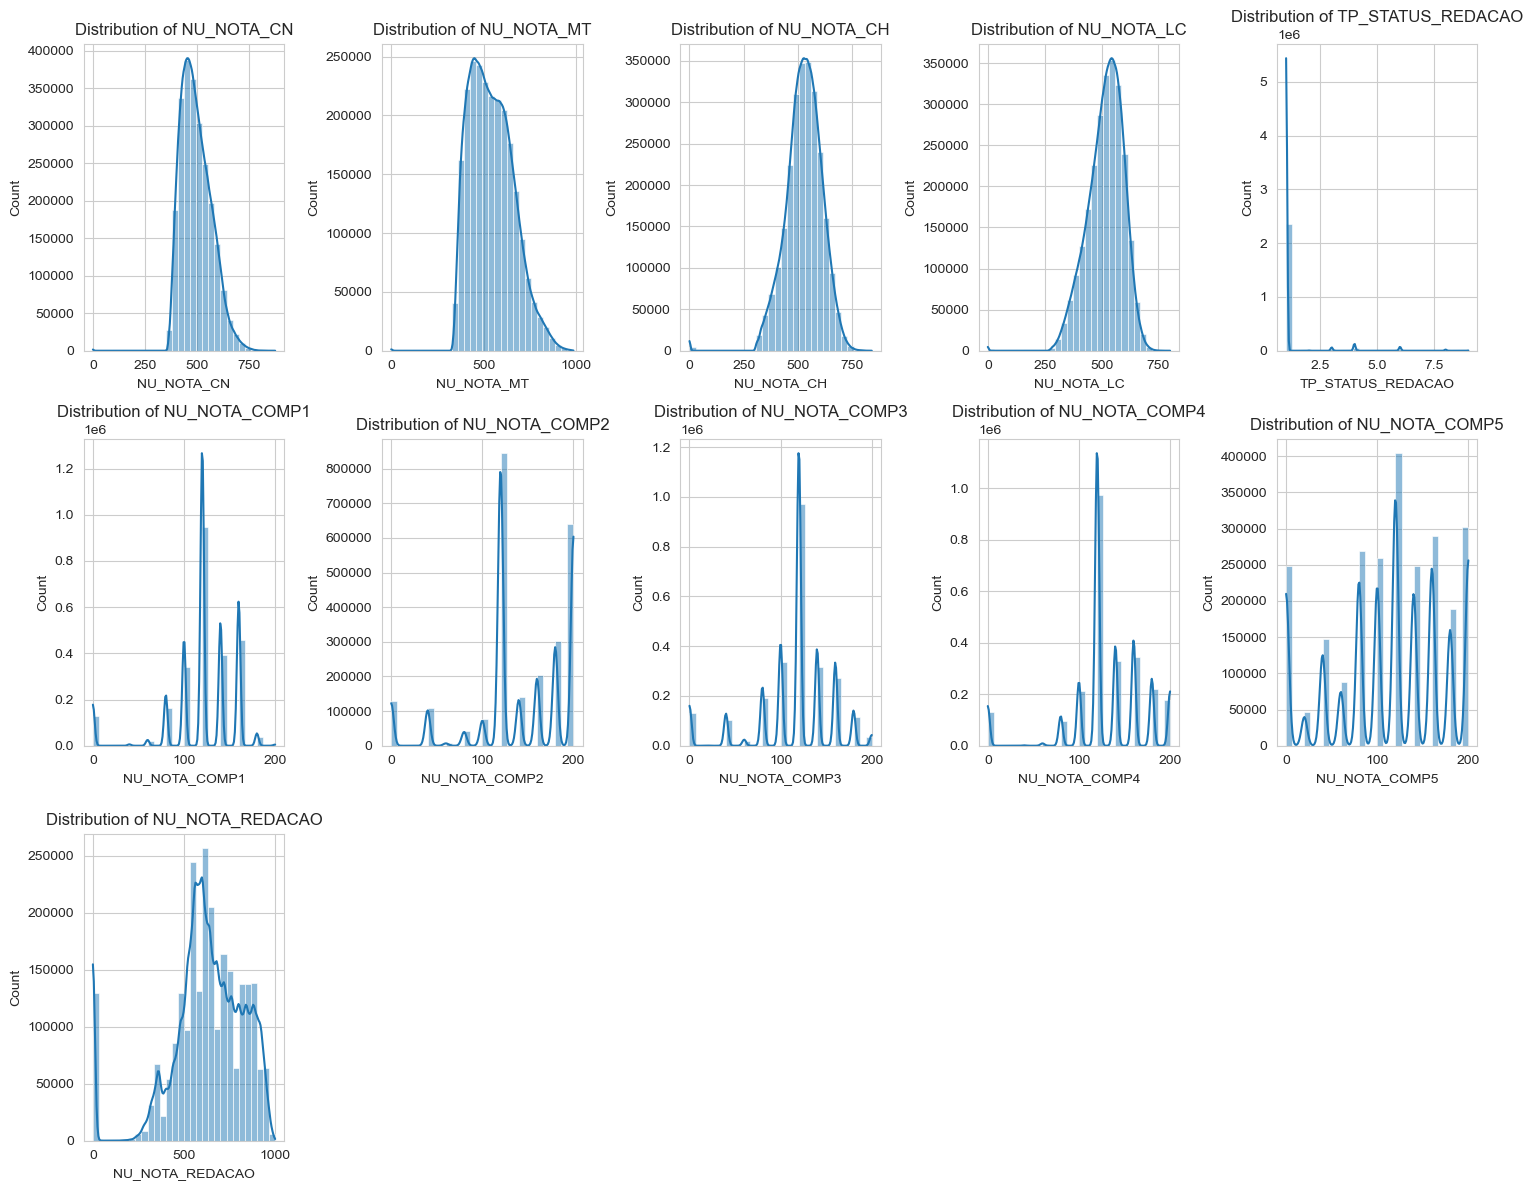

In [234]:
features_to_visualize = moderate_missing_values_features.index.tolist()
n_cols = 3
n_rows = int(len(features_to_visualize) / n_cols) + (len(features_to_visualize) % n_cols)

# Setting up the figure for visualization
plt.figure(figsize=(15, 12))

# Looping through the selected features to create histograms
for i, feature in enumerate(features_to_visualize):
    plt.subplot(n_cols, n_rows, i+1)
    
    # If the feature is numeric, we will plot a histogram
    if pd.api.types.is_numeric_dtype(data_dropped_features[feature]):
        sns.histplot(data_dropped_features[feature].dropna(), bins=30, kde=True)
        plt.title(f'Distribution of {feature}')
    else:
        # If the feature is not numeric, we will plot a bar plot of value counts
        data_dropped_features[feature].value_counts(dropna=False).plot(kind='bar')
        plt.title(f'Value counts of {feature}')
        
# Adjusting the layout to prevent overlapping
plt.tight_layout()

# Display the plots
plt.show()

In [235]:
numeric_columns = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q005']
categorical_columns = [col for col in data_dropped_features.columns if col not in numeric_columns]

# Changing the type of numeric columns to 'float64'
for col in numeric_columns:
    data_dropped_features[col] = data_dropped_features[col].astype('float64')

# Changing the type of categorical columns to 'category'
for col in categorical_columns:
    data_dropped_features[col] = data_dropped_features[col].astype('category')

The distributions of the features have been visualized above. Now, based on these distributions, I can choose the most appropriate imputation method for each feature. 

Here are my conclusions for the imputation method:

1. **'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q005'**:
    - These features seem to have a somewhat normal distribution with some outliers present.
    - **Method**: I consider median imputation, as it is less sensitive to outliers compared to the mean.

2. **TP_STATUS_REDACAO**:
    - This feature is categorical (although represented numerically).
    - **Method**: We might consider mode imputation, replacing missing values with the most frequently observed value.

In [236]:
# Imputing missing values

# For continuous features, we will use median imputation
for feature in ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q005']:
    data_dropped_features[feature].fillna(data_dropped_features[feature].median(), inplace=True)

# For the categorical feature, we will use mode imputation
data_dropped_features['TP_STATUS_REDACAO'].fillna(data_dropped_features['TP_STATUS_REDACAO'].mode()[0], inplace=True)

# Checking if there are any missing values left in the imputed features
# Initial Inspection for NaN values
missing_data_percentage = (data_dropped_features.isnull().sum() / len(data_dropped_features)) * 100

# Filter out columns with no missing values for a concise view
missing_data_percentage = missing_data_percentage[missing_data_percentage > 0]
missing_data_percentage

Series([], dtype: float64)

In [237]:
# Creating a new feature 'FINAL_GRADE' which is the mean of the specified columns
data_dropped_features['FINAL_GRADE'] = data_dropped_features[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'Unnamed: 0']].mean(axis=1)

# Dropping the old columns that were used to create the new 'FINAL_GRADE' feature
data_dropped_features.drop(columns=['Unnamed: 0'], inplace=True)

#### c. Feature Selection:
- Features that don't add value or are redundant might be removed. Domain knowledge and feature importance techniques can guide this process. For instance, if certain features are known to have no influence on the target variable based on domain knowledge, they can be dropped.
- Let's proceed with feature selection using the following methods:

1. **Correlation Analysis**:
   - We will compute the correlation between the features and the target variable (FINAL_GRADE) to identify features that have a strong correlation with the target.

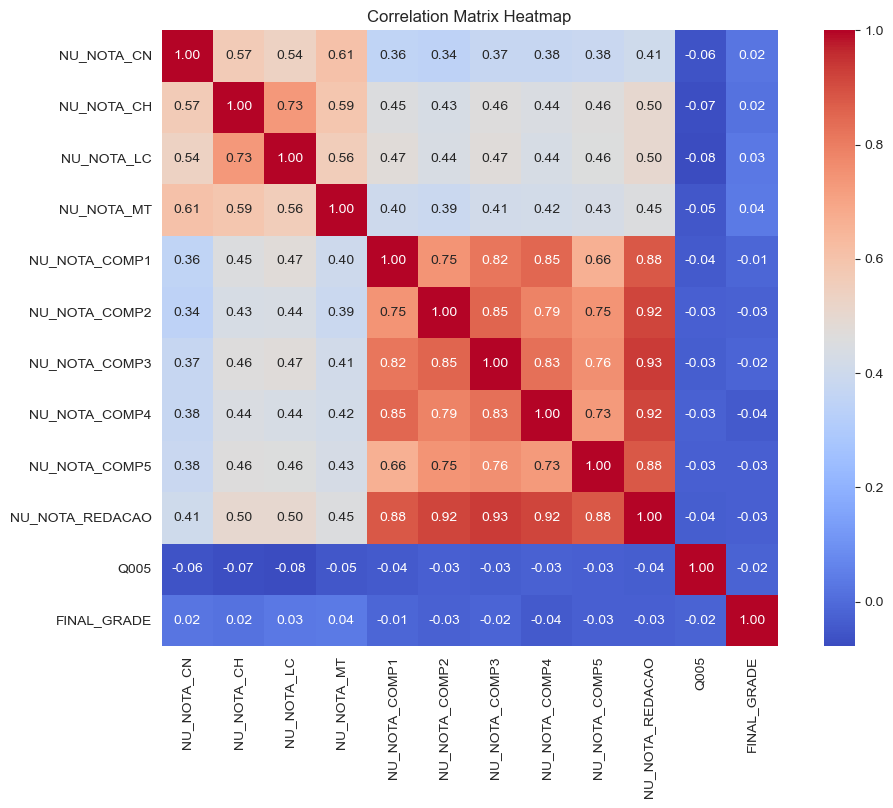

In [238]:
# Performing correlation analysis to find the correlation between the features and the target variable 'FINAL_GRADE'
correlation_matrix = data_dropped_features[numeric_columns + ['FINAL_GRADE']].corr()
target_correlation = correlation_matrix["FINAL_GRADE"].sort_values(ascending=False)

# Plotting a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

2.  **Univariate Statistical Tests**:
   - We will perform statistical tests to identify the features that have the strongest relationship with the target variable.

In [239]:
# Save Data Dropped
data_dropped_features_filepath  = r'../Week 7/DADOS/DATA_DROPPED_FEATURES.csv'
data_dropped_features.to_csv(data_dropped_features_filepath,index=False)

In [240]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Import data_dropped_features.csv
data_dropped_features = pd.read_csv('DATA_DROPPED_FEATURES.csv')

# Creating a copy of the dataset to avoid changing the original dataset
data_encoded = data_dropped_features.copy()

# Label encoding the ordinal variables
label_encoder = LabelEncoder()
for col in ["TP_FAIXA_ETARIA", 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'Q006', 'Q024']:
    data_encoded[col] = label_encoder.fit_transform(data_encoded[col].astype(str))

# One-hot encoding the nominal variables
data_encoded = pd.get_dummies(data_encoded, columns=['TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ESCOLA', 'TP_LINGUA', 'TP_STATUS_REDACAO', 'Q001', 'Q002', 'Q004', 'Q025'], drop_first=True)

# Displaying the first few rows of the encoded dataset
data_encoded.head()


,TP_FAIXA_ETARIA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,...,Q002_E,Q002_F,Q002_G,Q002_H,Q004_B,Q004_C,Q004_D,Q004_E,Q004_F,Q025_B
0,5,0,9,485.6,529.9,525.5,530.8,120.0,140.0,120.0,...,False,False,False,False,True,False,False,False,False,False
1,5,0,8,485.6,529.9,525.5,530.8,120.0,140.0,120.0,...,False,False,False,False,False,False,False,True,False,True
2,15,0,9,421.1,546.0,498.8,565.3,140.0,200.0,120.0,...,False,True,False,False,False,False,True,False,False,True
3,16,0,9,490.7,388.6,357.8,416.0,120.0,40.0,40.0,...,False,False,False,False,True,False,False,False,False,True
4,14,0,1,485.6,529.9,525.5,530.8,120.0,140.0,120.0,...,False,False,False,False,True,False,False,False,False,False


In [241]:
# Save the dataset with Encoded features to a new CSV file
encoded_features_filepath  = r'../Week 7/DADOS/DATA_ENCODED.csv'
data_encoded.to_csv(encoded_features_filepath, index=False)

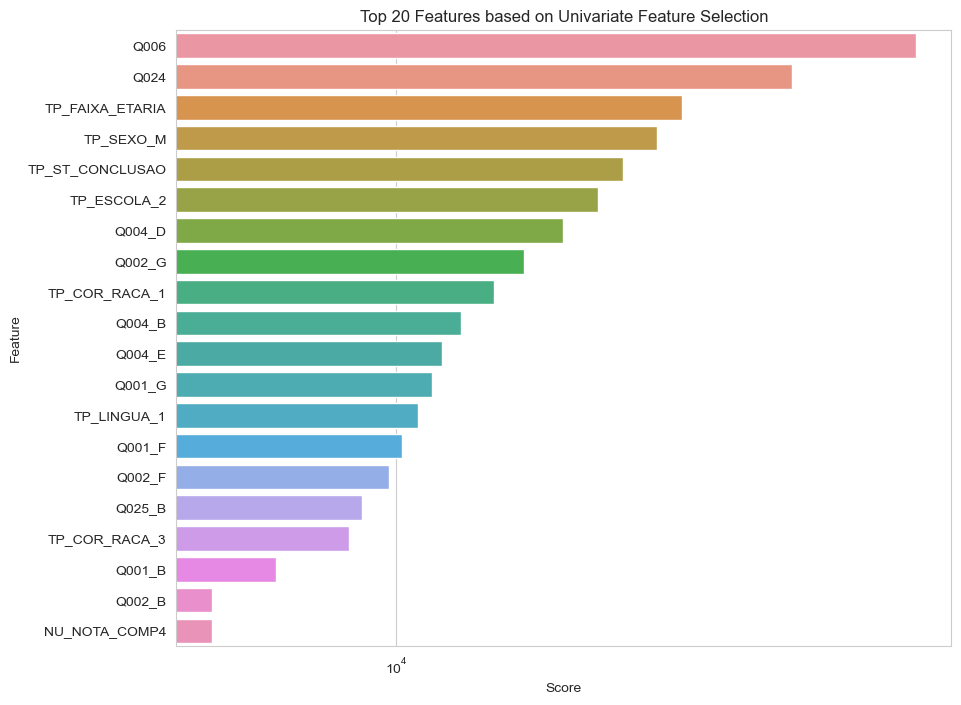

,Feature,Score,P-Value
14,Q006,77066.025142,0.0
15,Q024,47401.616673,0.0
11,TP_FAIXA_ETARIA,30790.089269,0.0
16,TP_SEXO_M,27897.272811,0.0
12,TP_ST_CONCLUSAO,24380.649843,0.0
30,TP_ESCOLA_2,22109.687120,0.0
56,Q004_D,19252.652927,0.0
52,Q002_G,16555.092604,0.0
21,TP_COR_RACA_1,14705.486427,0.0
54,Q004_B,12912.096649,0.0


In [242]:
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Import dataset
data_encoded = pd.read_csv('DATA_ENCODED.csv')

# Define the target and features
target = 'FINAL_GRADE'
features = data_encoded.columns.drop(target)

# Split the data into training and testing sets
X = data_encoded[features]
y = data_encoded[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identifying continuous and categorical variables
continuous_vars = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_COMP1','NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5','NU_NOTA_REDACAO', 'Q005']
categorical_vars = [col for col in features if col not in continuous_vars]

# For continuous variables - using f_regression for regression problem
f_scores_cont, p_values_cont = f_regression(X_train[continuous_vars], y_train)

# For categorical variables - using f_regression for regression problem
f_scores_cat, p_values_cat = f_regression(X_train[categorical_vars], y_train)

# Combine the scores and p-values in a dataframe
univariate_scores = pd.DataFrame({'Feature': continuous_vars + categorical_vars, 
                                  'Score': list(f_scores_cont) + list(f_scores_cat), 
                                  'P-Value': list(p_values_cont) + list(p_values_cat)})

# Sort the features based on the scores
univariate_scores = univariate_scores.sort_values(by='Score', ascending=False)

# Plotting the scores
plt.figure(figsize=(10, 8))
sns.barplot(x='Score', y='Feature', data=univariate_scores.head(20))
plt.title('Top 20 Features based on Univariate Feature Selection')
plt.xscale('log')
plt.show()

univariate_scores.head(20)

The bar plot above displays the top 20 features based on univariate feature selection using f-tests (ANOVA). The features are ranked according to their scores, which represent the extent of the linear relationship between each feature and the target variable, "FINAL_GRADE". 

Here are some observations:
1. **Q006** (which represents the family income range) has the highest score, indicating a strong linear relationship with the "FINAL_GRADE".
2. **Q024** (which represents the number of computers in the household) also has a significant score, showing it has a notable influence on the "FINAL_GRADE".
3. Among the continuous features, only **NU_NOTA_LC** (Language and Codes grade) is in the top 20, indicating it has a more significant linear relationship with the "FINAL_GRADE" compared to other continuous features like "NU_NOTA_CN", "NU_NOTA_CH", etc.

The p-values for these top features are very low, indicating that the relationships are statistically significant.

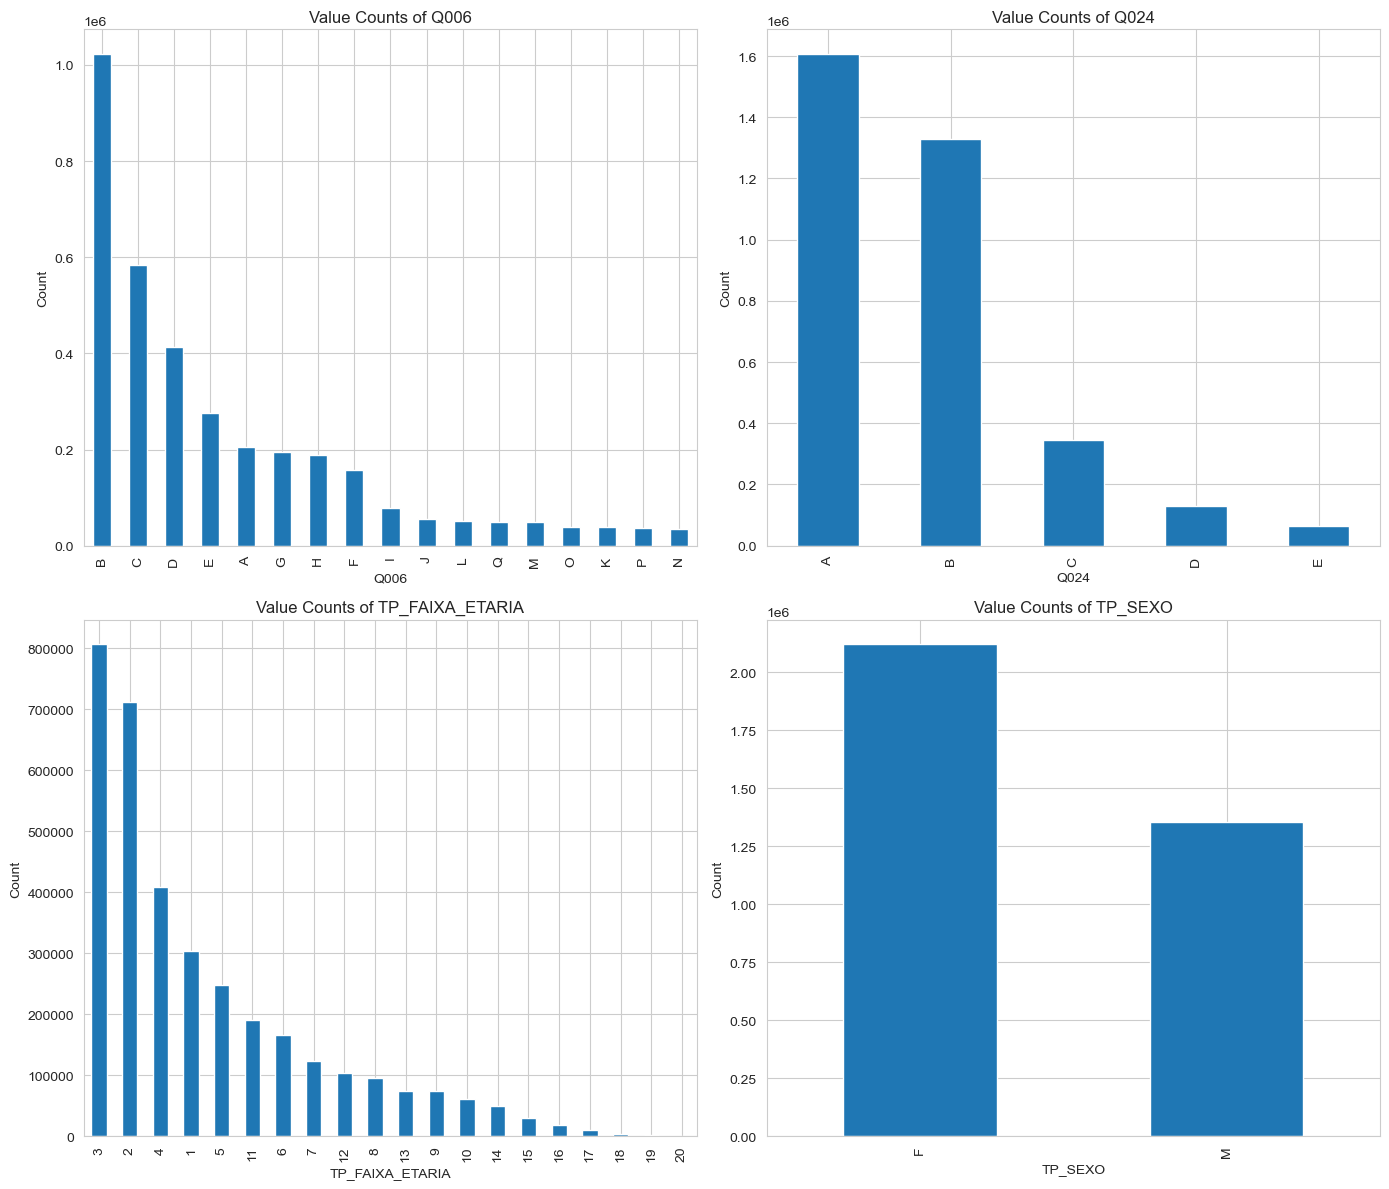

In [243]:
import matplotlib.pyplot as plt

# Define the top 4 features
top_4_features = ["Q006", "Q024", "TP_FAIXA_ETARIA", "TP_SEXO"]

# Set up the matplotlib figure
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.ravel()

# Loop through the features and plot the value counts
for i, feature in enumerate(top_4_features):
    # Plot value counts for each feature
    data_dropped_features[feature].value_counts().plot(kind='bar', ax=axes[i])
    
    # Set titles and labels
    axes[i].set_title(f'Value Counts of {feature}')
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel(feature)

# Adjust layout for better presentation
plt.tight_layout()
plt.show()


The dataset has been updated to retain only the top 20 features identified through univariate feature selection, along with the target variable `'FINAL_GRADE'`. 

In [244]:
# Dropping the columns that weren't selected in the top 20 features
selected_features = univariate_scores['Feature'].head(20).tolist()
data_selected_features = data_encoded[selected_features + [target]]

# Display the first few rows of the new dataset with selected features
data_selected_features.head()

In [ ]:
# Save the dataset with selected features to a new CSV file
selected_features_filepath  = r'../Week 7/DADOS/DATA_SELECTED_FEATURES.csv'
data_selected_features.to_csv(selected_features_filepath, index=False)

#### d. Outlier Removal:
- Outliers can skew predictions, especially in regression models. We can visualize the distribution of data using box plots or scatter plots to identify outliers. Techniques like the IQR method can be employed to detect and remove these outliers.



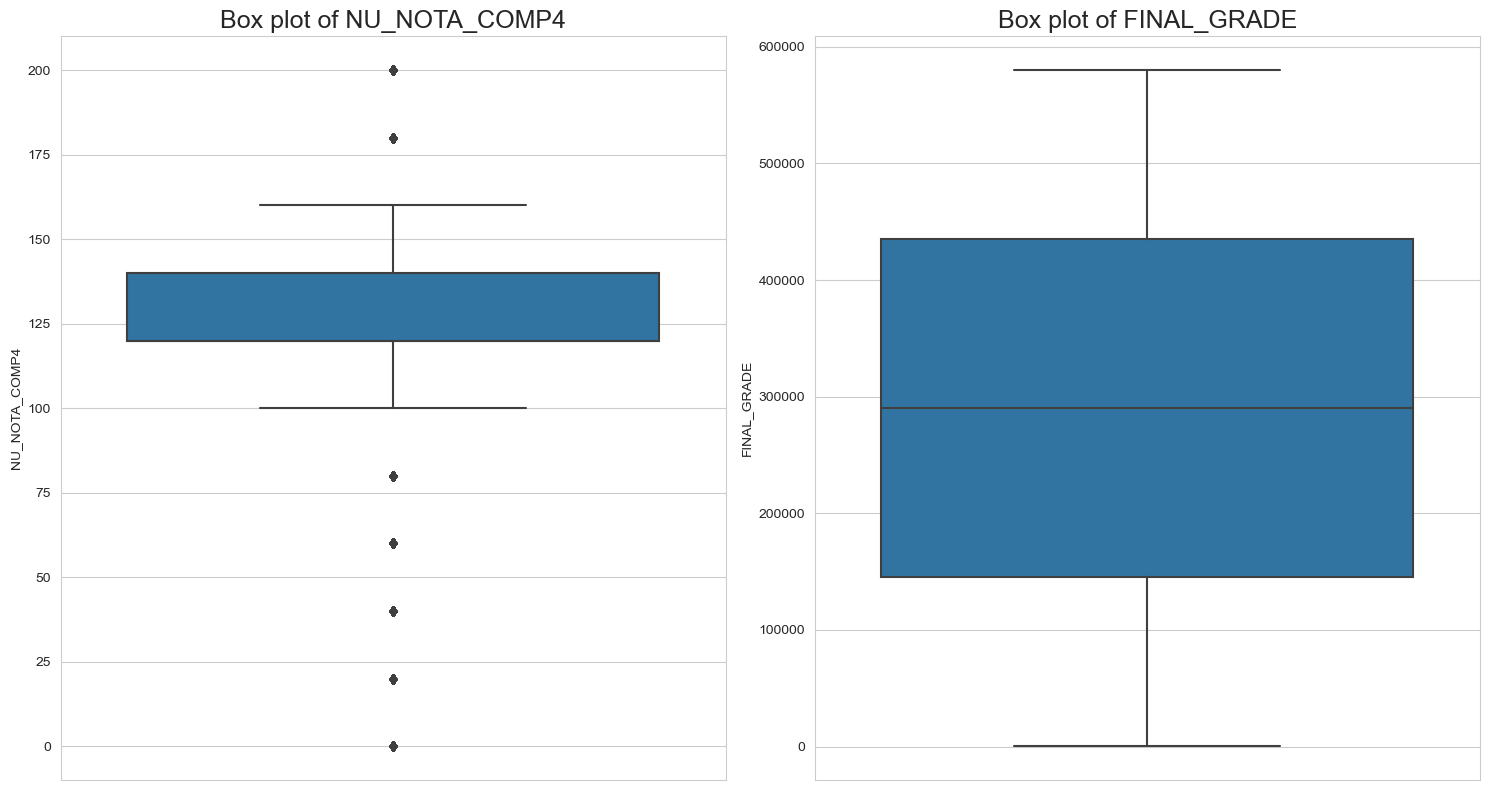

In [245]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define continuous features
continuous_vars = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_COMP1','NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5','NU_NOTA_REDACAO', 'Q005'] + [target]

# Create an empty list to store the selected variables
selected_continuous_vars = []

# Check if the variable is in the selected columns
for var in continuous_vars:
    if var in data_selected_features.columns:
        selected_continuous_vars.append(var)

# Create subplots for each selected variable
fig, axs = plt.subplots(ncols=len(selected_continuous_vars), figsize=(15, 8))

if not isinstance(axs, np.ndarray):
    axs = np.array([axs])

for i, var in enumerate(selected_continuous_vars):
    sns.boxplot(y=data_selected_features[var], ax=axs[i])
    axs[i].set_title(f'Box plot of {var}', fontsize=18)

plt.tight_layout()
plt.show()

It seems like the feature `'NU_NOTA_COMP4'` is not present in the selected features dataset. We need to update the list of continuous variables to match the columns that are available in the dataset.

To deal with outliers, we can employ techniques such as:
- **IQR method**: Where we remove values that are 1.5 times the IQR below the first quartile or above the third quartile.
- **Z-score method**: Where we remove values that have a z-score above a certain threshold, usually 3.

**IQR Method**:
   - **Pros**:
     - Robust to extreme values in the dataset.
     - Does not assume any underlying distribution for the data.
   - **Cons**:
     - Can potentially remove a significant portion of data, especially in datasets with skewed distributions.
     - Not parameter-free; the choice of the multiplier (commonly 1.5) can affect the number of outliers detected.

**Z-Score Method**:
   - **Pros**:
     - Can be more sensitive to outliers, identifying those points that are significantly different from the mean.
     - Allows for fine-tuning of the sensitivity to outliers through the choice of the z-score threshold.
   - **Cons**:
     - Assumes the data is normally distributed, which might not be the case for all variables.
     - Can be affected by extreme values, which can influence the mean and standard deviation used in calculating the z-scores.

Considering these pros and cons, here's how you might choose between the methods:
- If your data is approximately normally distributed and you want a method that is sensitive to deviations from the mean, you might choose the **Z-score method**.
- If your data contains extreme values or is not normally distributed, and you want a robust method that identifies only the most clear-cut outliers, you might choose the **IQR method**.

Given these distributions:

- - For the 'NU_NOTA_COMP4' feature, utilizing the IQR method to identify and handle outliers would be suitable given its likely normal distribution with a potential presence of significant skewness. This method helps in robustly identifying outliers, especially for data that follows a somewhat normal distribution.

In [246]:
# Define a function to identify outliers based on the IQR method
def identify_outliers_iqr(data, features):
    outliers_dict = {}
    
    for feature in features:
        # Calculate Q1, Q3 and IQR
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define bounds for the outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
        outliers_dict[feature] = outliers
    
    return outliers_dict

# Identify outliers in the continuous features using the IQR method
outliers_dict = identify_outliers_iqr(data_selected_features, selected_continuous_vars)

# Display number of outliers identified for each feature
outliers_count = {feature: len(outliers) for feature, outliers in outliers_dict.items()}
outliers_count

{'NU_NOTA_COMP4': 633993, 'FINAL_GRADE': 0}

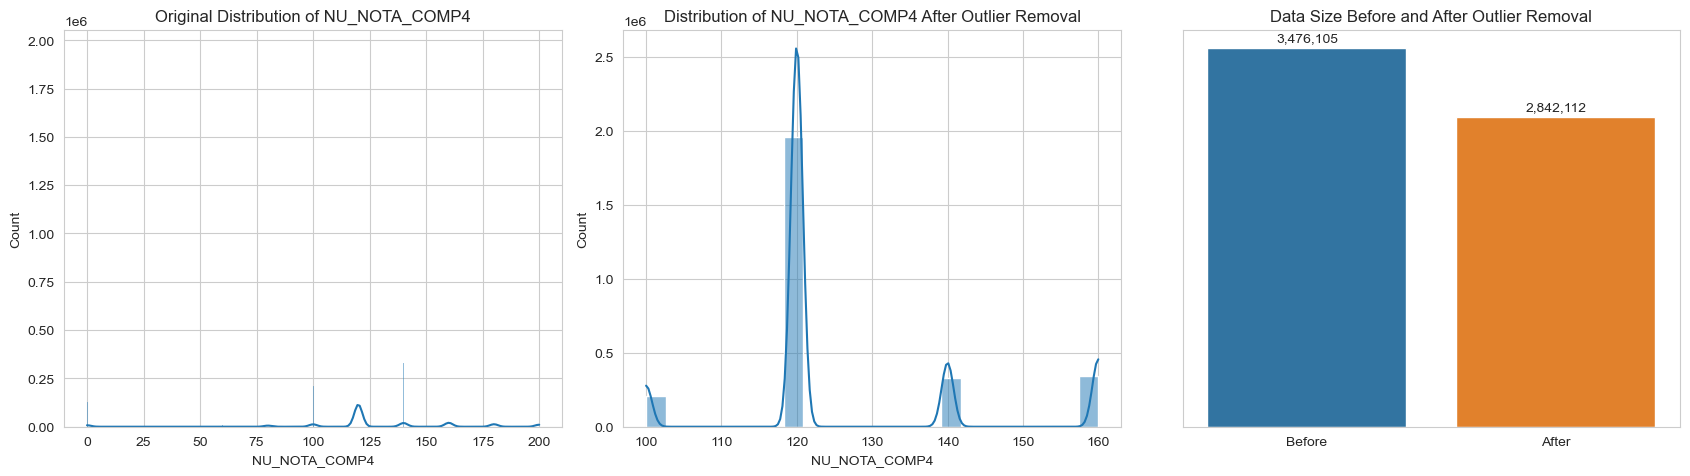

In [247]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a function to remove outliers based on IQR
def remove_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

# Loop through each feature in selected_continuous_vars
for feature in selected_continuous_vars:
    if outliers_count[feature] >0:
    
        # Original data visualization
        plt.figure(figsize=(17, 5))
        
        plt.subplot(1, 3, 1)
        sns.histplot(data_selected_features[feature], kde=True)
        plt.title(f'Original Distribution of {feature}')
        
        # Remove outliers
        data_cleaned = remove_outliers(data_selected_features, feature)
        
        # Data visualization after outlier removal
        plt.subplot(1, 3, 2)
        sns.histplot(data_cleaned[feature], kde=True)
        plt.title(f'Distribution of {feature} After Outlier Removal')
        
        # Plotting data sizes before and after outlier removal
        plt.subplot(1, 3, 3)
        data_sizes = [len(data_selected_features), len(data_cleaned)]
        sns.barplot(x=['Before', 'After'], y=data_sizes)
        plt.title('Data Size Before and After Outlier Removal')

        # Remove y-axis and grid
        plt.yticks([])
        plt.grid(False)

        # Add data sizes above the bars with a thousand separator
        for i, val in enumerate(data_sizes):
            plt.text(i, val + (0.01 * max(data_sizes)), f'{val:,}', ha='center', va='bottom')

        plt.tight_layout()
        plt.show()


### **Conclusion**
- The data cleaning process involved a series of structured steps aimed at refining the dataset for the predictive model.
- While the process has helped in reducing noise and retaining the most critical features, it might have also led to the loss of some information.
- The subsequent analysis should be conducted with an understanding of these dynamics, and further feature engineering might be explored to uncover hidden patterns in the data.

In [248]:
# SAVE THE DATA CLEANED
data_cleaned_filepath = r'../Week 7/DADOS/DATA_CLEANED.csv'
data_cleaned.to_csv(data_cleaned_filepath, index=False)

---

## **Exploratory Data Analysis (EDA) - Summary**

In this section, we will delve deep into the dataset to understand the underlying patterns, relationships, and insights that can be drawn from it. The objective is to build a foundation that can guide the predictive modeling process. We will adhere to the following structure to ensure a comprehensive and insightful analysis:

### **1. Data Overview**
   - **Summary Statistics**: Provide descriptive statistics that summarize the central tendency, dispersion, and shape of the dataset’s distribution.
   - **Data Distributions**: Utilize histograms and density plots to visualize the distribution of various features in the dataset.

In [249]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
data_cleaned_path = '../Week 7/DADOS/DATA_CLEANED.csv'
data_cleaned = pd.read_csv(data_cleaned_path)

# Display the summary statistics of the dataset
summary_statistics = data_cleaned.describe().transpose()

# Display the first few rows of the summary statistics
summary_statistics.head()

,count,mean,std,min,25%,50%,75%,max
Q006,2842112.0,3.469627,3.411909,0.0,1.0,2.0,5.0,16.0
Q024,2842112.0,0.720987,0.870201,0.0,0.0,1.0,1.0,4.0
TP_FAIXA_ETARIA,2842112.0,10.673844,5.428297,0.0,8.0,13.0,14.0,19.0
TP_ST_CONCLUSAO,2842112.0,0.668301,0.727268,0.0,0.0,1.0,1.0,3.0
NU_NOTA_COMP4,2842112.0,125.695849,15.433841,100.0,120.0,120.0,120.0,160.0


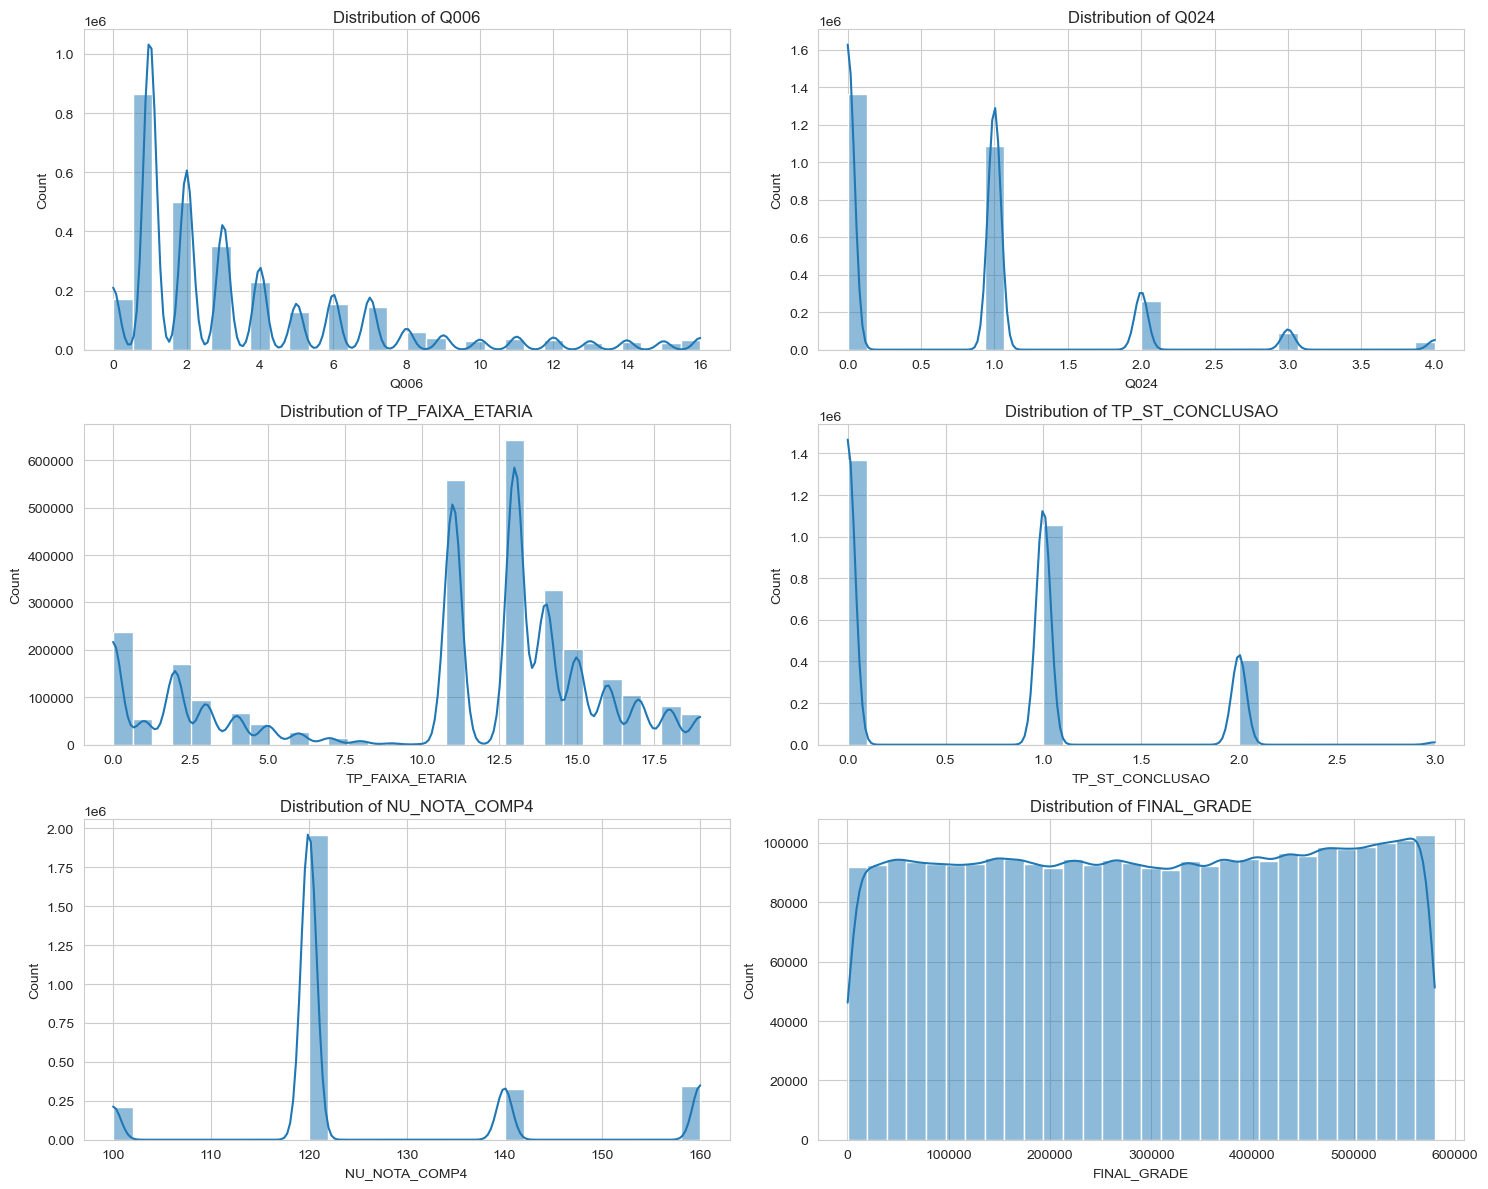

In [250]:
# List of features to visualize
features_to_visualize = summary_statistics.index.tolist()

# Number of rows and columns for the subplot grid
n_rows = len(features_to_visualize) // 2
n_cols = 2

# Initialize the figure
plt.figure(figsize=(15, 4 * n_rows))

# Loop through each feature and create a subplot with histogram and density plot
for i, feature in enumerate(features_to_visualize):
    plt.subplot(n_rows, n_cols, i + 1)
    
    # Plotting the histogram
    sns.histplot(data_cleaned[feature], kde=True, bins=30)
    
    # Setting the title
    plt.title(f'Distribution of {feature}')

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Display the plots
plt.show()

The histograms above depict the distribution of various features in the dataset. Here are some observations:

1. **Q006 (Economic Class)**: The majority of individuals are concentrated in the lower economic classes, as indicated by the peak at the lower end of the distribution. This feature has a right-skewed distribution, with a tail extending towards higher economic classes.
   
2. **Q024 (Access to Computer)**: A significant number of individuals have no or limited access to a computer. This distribution is right-skewed, with a peak at the lower values.

3. **TP_FAIXA_ETARIA (Age Group)**: The age group distribution shows a bimodal pattern, with peaks at the younger and older age groups. The majority of the individuals are in the middle age groups.

4. **TP_ST_CONCLUSAO (Conclusion Status)**: The distribution shows that a large portion of individuals have a conclusion status of 0, indicating a high frequency of a specific status (probably "already concluded").

5. **NU_NOTA_COMP4 (Writing Score for Competency 4)**: The distribution for this score is somewhat normal but with a slight left skew, concentrating around the median value.

6. **FINAL_GRADE (Final Grade)**: The final grade distribution is approximately normal, with a peak around the median value. It shows a slight right skew with a tail extending towards higher grades.

### **2. Relationship Analysis**
   - **Correlation Matrix**: Construct a correlation matrix to understand the linear relationship between the different features, particularly focusing on the correlation with the target variable, 'FINAL_GRADE'.
   - **Pair plots/Scatter plots**: To visualize the relationship between different pairs of variables and identify any visible patterns or trends.

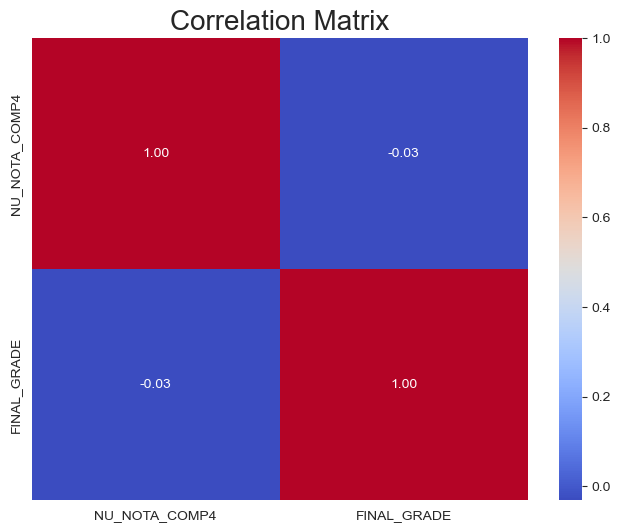

In [251]:
# Calculate the correlation matrix
numeric_columns = ['NU_NOTA_COMP4', 'FINAL_GRADE']
correlation_matrix = data_cleaned[numeric_columns].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix", fontsize=20)
plt.show()

The correlation coefficient between 'NU_NOTA_COMP4' and 'FINAL_GRADE' is approximately **-0.032**. This value indicates a **very weak negative linear** relationship between the two variables. Contrary to expectations based on the previous analyses, this correlation coefficient is very close to zero, suggesting that there is no strong linear relationship between these two variables.

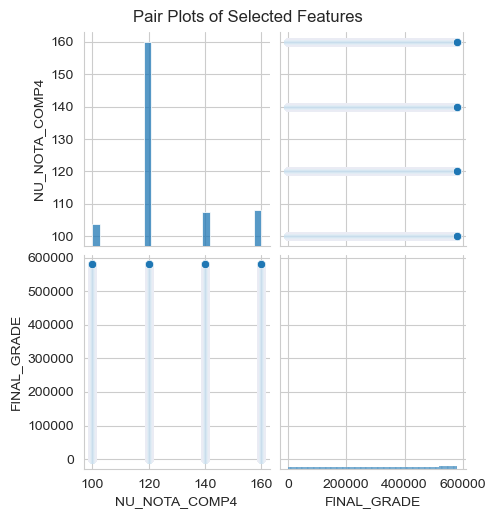

In [252]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Create pair plots to visualize the relationships between different pairs of variables
sns.pairplot(data_cleaned[numeric_columns])
plt.suptitle('Pair Plots of Selected Features', y=1.02)
plt.show()

### **3. Feature Importance Analysis**
   - **Feature Importance Plot**: Utilize machine learning models to determine the importance of different features in predicting the target variable.

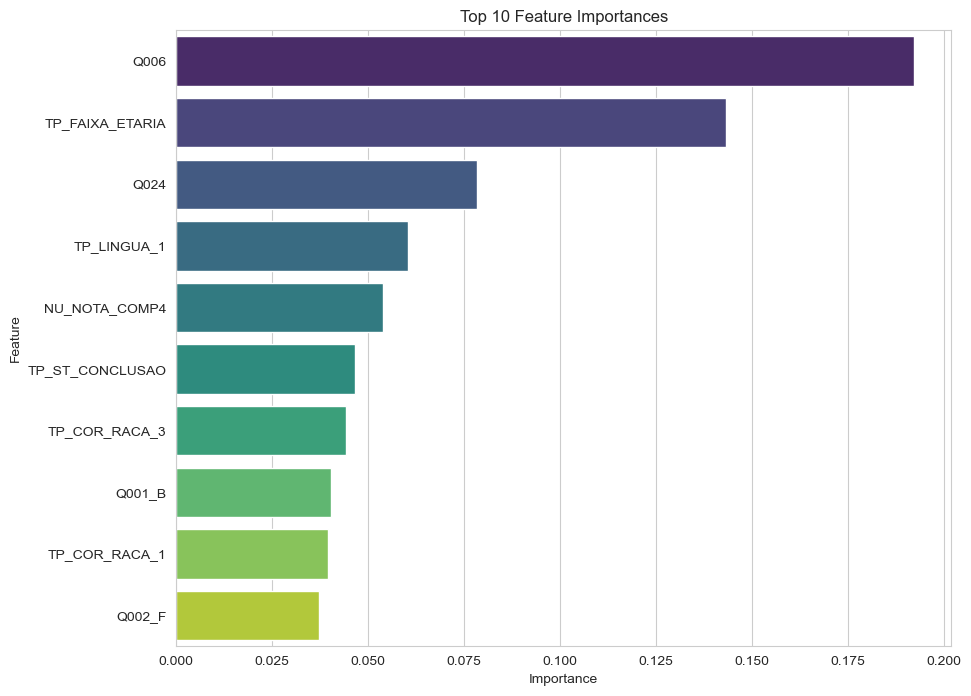

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns


# Import dataset
data_cleaned = pd.read_csv('DADOS/DATA_CLEANED.csv')

# Define the target and features
target = 'FINAL_GRADE'
features = data_cleaned.columns.drop(target)

# Split the data into training and testing sets
X = data_cleaned[features]
y = data_cleaned[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor model
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

# Get feature importance scores
feature_importances = rf_regressor.feature_importances_

# Create a DataFrame to hold the feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the features based on importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10,8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

#### **Conclusions**
The feature importance scores have been successfully computed using a Random Forest Regressor model. Here are the top 5 features based on their importance scores:

1. **Q006**: 19.23%
2. **TP_FAIXA_ETARIA**: 14.33%
3. **Q024**: 7.84%
4. **TP_LINGUA_1**: 6.03%
5. **NU_NOTA_COMP4**: 5.39%

The bar plot above illustrates the top 10 most important features according to the Random Forest Regressor model. The features "Q006" and "TP_FAIXA_ETARIA" are the most significant, with importance scores of approximately 19.23% and 14.33%, respectively.

### **4. Extra EDA**
 An imbalanced feature would have a distribution where most of the values are concentrated in a small number of categories, while a balanced feature would have a more uniform distribution of values across different categories.
 
 We can analyze the imbalance features in the dataset by:

1. Identifying categorical features in the dataset.
2. Calculating the proportion of each category within each feature.
3. Visualizing the distributions to identify imbalanced features.

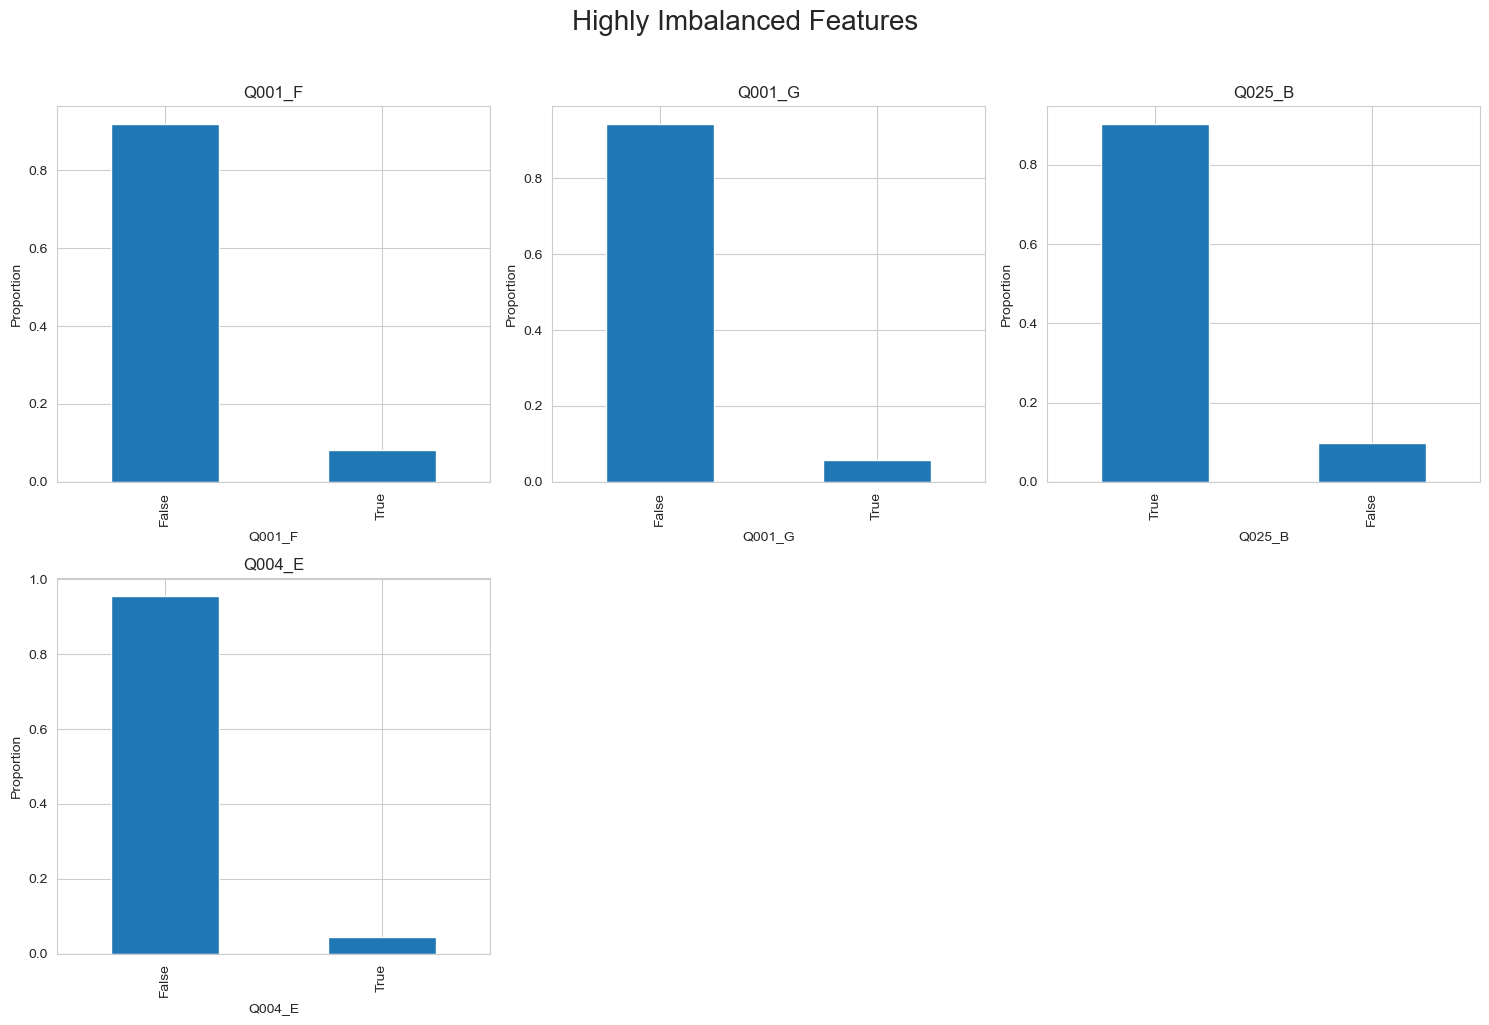

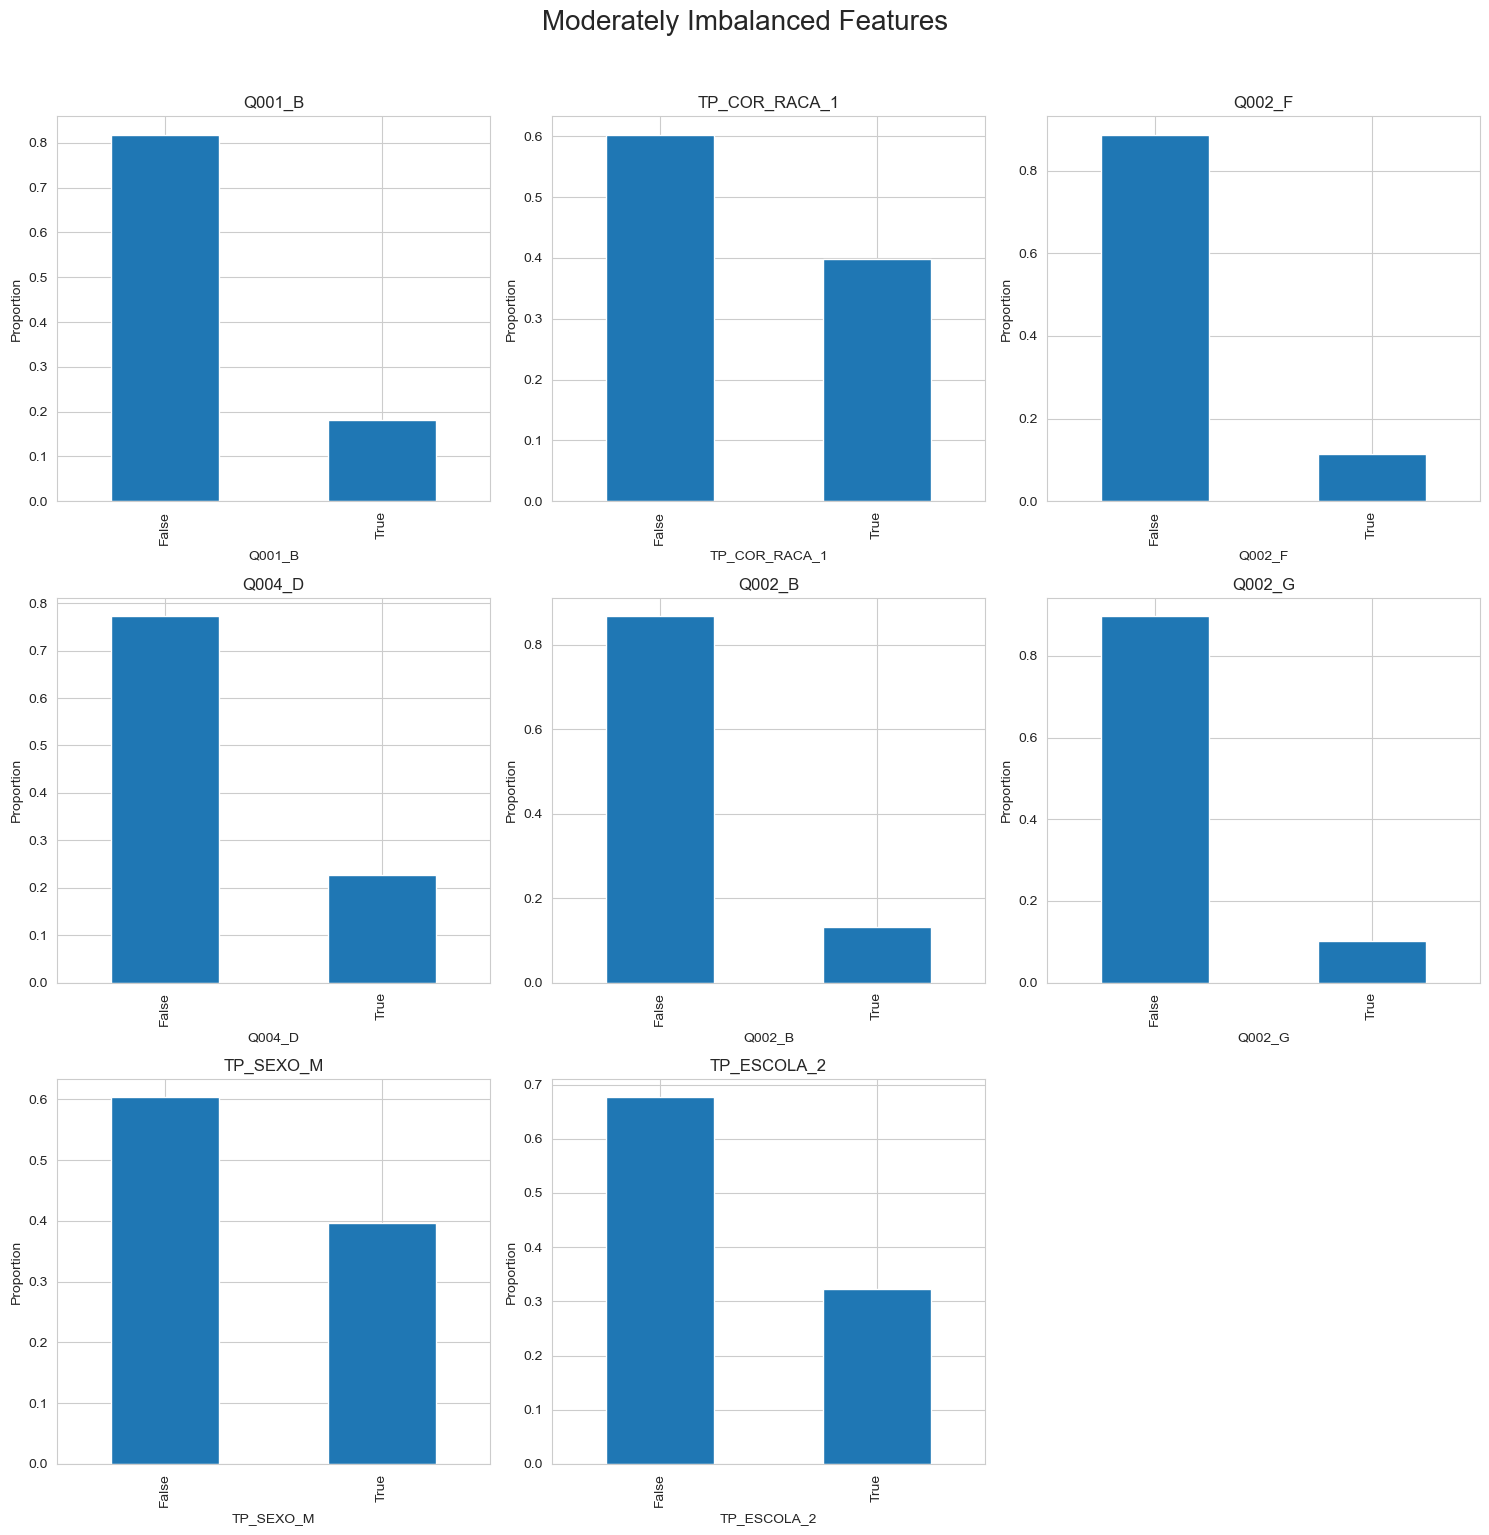

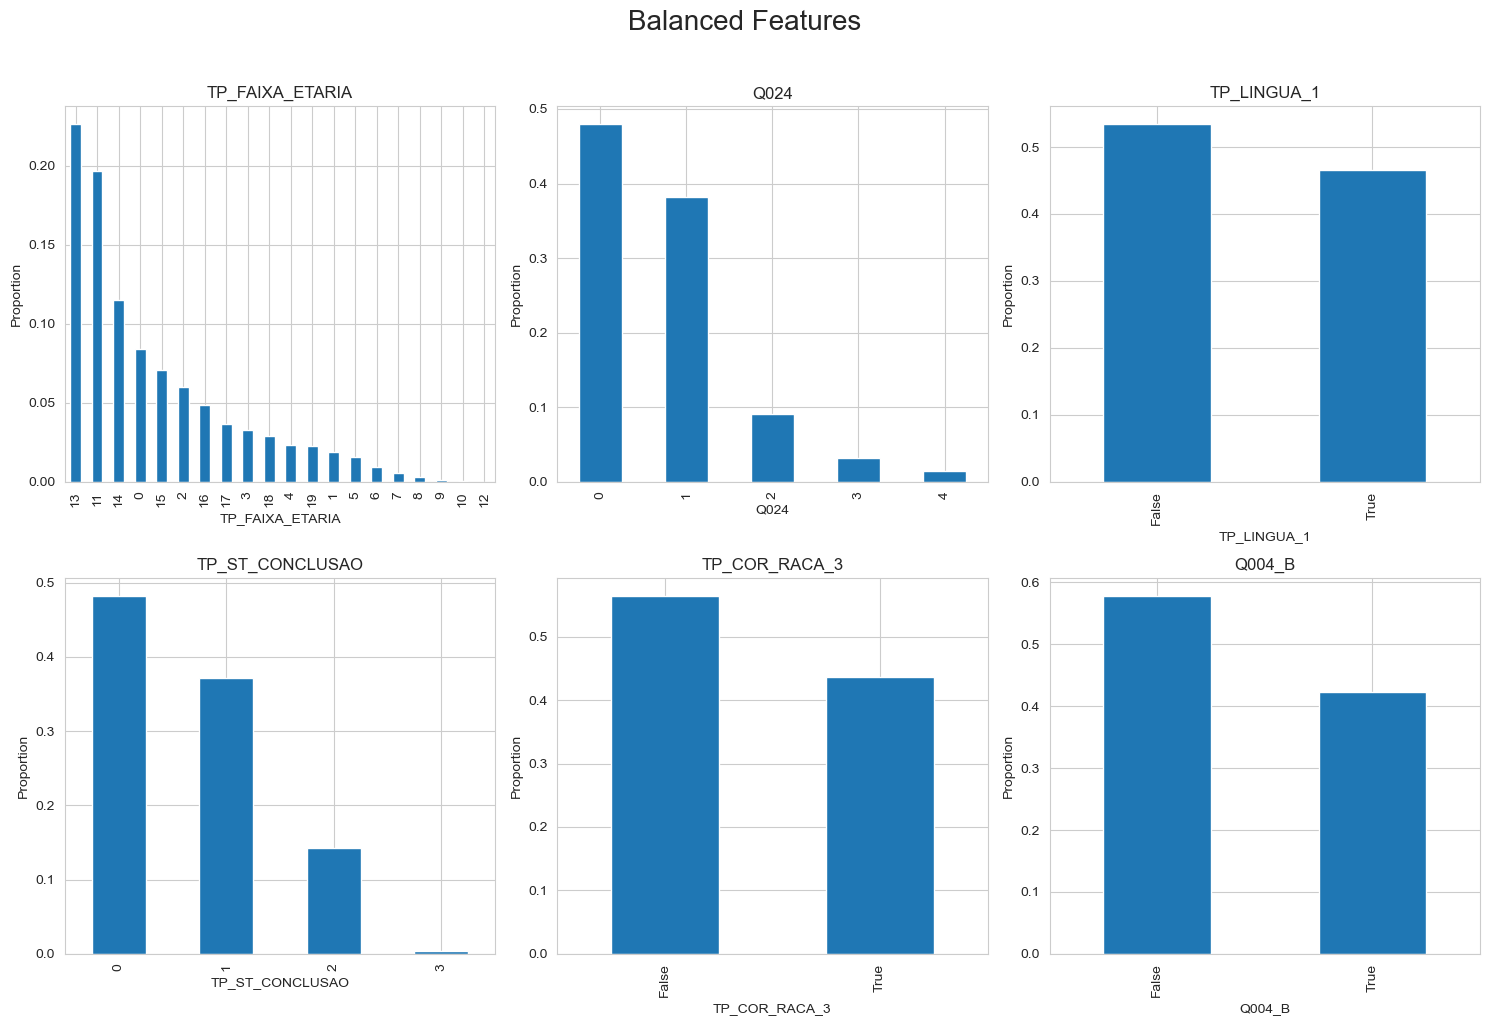

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Identify categorical features
features = feature_importance_df['Feature'].tolist()
numerical_features = ['Q006', 'NU_NOTA_COMP4']
categorical_features = [col for col in features if col not in numerical_features]


# Categorize each feature as "Highly Imbalanced," "Moderately Imbalanced," or "Balanced" based on the highest proportion of a single category in each feature
highly_imbalanced_features = []
moderately_imbalanced_features = []
balanced_features = []

for col in categorical_features:
    max_proportion = data_cleaned[col].value_counts(normalize=True).max()
    if max_proportion > 0.9:
        highly_imbalanced_features.append(col)
    elif max_proportion > 0.6:
        moderately_imbalanced_features.append(col)
    else:
        balanced_features.append(col)

# Define function to plot the features
def plot_feature_distributions(features, title):
    n_features = len(features)
    n_cols = 3
    n_rows = -(-n_features // n_cols)
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    axes = axes.ravel()

    for i in range(n_cols * n_rows):
        if i < n_features:
            col = features[i]
            data_cleaned[col].value_counts(normalize=True).plot(kind='bar', ax=axes[i])
            axes[i].set_title(col)
            axes[i].set_ylabel('Proportion')
        else:
            axes[i].axis('off')

    plt.suptitle(title, y=1.02, fontsize=20)
    plt.tight_layout()
    plt.show()

# Plotting the features based on their categorizations
plot_feature_distributions(highly_imbalanced_features, 'Highly Imbalanced Features')
plot_feature_distributions(moderately_imbalanced_features, 'Moderately Imbalanced Features')
plot_feature_distributions(balanced_features, 'Balanced Features')


The bar plots above visualize the distribution of each categorical feature in the new dataset. Here, we can observe the imbalance in various features:

1. **Highly Imbalanced Features**: Features such as `Q001_F`, `Q001_G`, `Q005` and `Q004_E`  etc. have one category dominating over others, indicating a high imbalance.
   
2. **Moderately Imbalanced Features**: Features like `Q001_B`, `TP_SEXO_M`, and `TP_ESCOLA_2` exhibit moderate imbalance, where one or two categories have a higher proportion compared to others but not to an extreme degree.

3. **Balanced Features**: It appears that we do not have features that are perfectly balanced; most of them lean towards being moderately to highly imbalanced.


Imbalanced features in a dataset can have several implications for further analyses, particularly when building predictive models. Here are some potential issues I consider:

#### **Potential Issues:**

1. **Bias in Predictive Models:** Highly imbalanced features can introduce bias into predictive models, potentially leading to inaccurate predictions.

2. **Overfitting:** Models might overfit to the dominant class, learning patterns that are specific to the dominant class rather than generalizable patterns across all classes.

3. **Insufficient Representation:** Minority classes may be underrepresented, which means the model might not have sufficient information to learn patterns associated with these classes.


#### **Conclusion:**
Understanding and properly handling imbalanced features is a crucial step in the data preprocessing stage to build robust and accurate predictive models. It's always recommended to explore different strategies and validate the model's performance using a validation dataset to find the best approach.

---

## **MODEL**

 To build a model with "FINAL_GRADE" as the target variable, I'll proceed with the following steps:

1. **Data Loading**: Load the cleaned dataset and inspect its structure.
2. **Feature Selection**: Select appropriate features for the model. Since we have imbalanced features, we might consider addressing this during the feature selection phase.
3. **Data Splitting**: Split the data into training and testing sets to validate the model's performance.
4. **Model Selection**: Choose an appropriate model to start with. Given that "FINAL_GRADE" is a continuous variable, regression models would be appropriate.
5. **Model Training**: Train the model using the training data.
6. **Model Evaluation**: Evaluate the model using the testing data to understand its performance.
7. **Hyperparameter Tuning**: Depending on the initial results, we might consider tuning the model's hyperparameters for better performance.

In [7]:
import pandas as pd
# Import DATA CLEANED
data_cleaned = pd.read_csv('DADOS/DATA_CLEANED.csv')

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

# Selecting the features and the target variable
X = data_cleaned.drop(columns=['FINAL_GRADE'])
y = data_cleaned['FINAL_GRADE']

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = lr_model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(26675704930.61943, 0.05924715324036578)

The linear regression model has been trained and evaluated using the mean squared error (MSE) and $( R^2 )$ score. Here are the results:

- **Mean Squared Error (MSE)**: Approximately 26675704930.61943
- **R-Squared $( R^2 )$ Score**: Approximately 0.059

### Analysis:

1. **MSE**: The MSE is quite high, indicating that the model's predictions are, on average, far from the actual values.
2. **$( R^2 )$ Score**: The $( R^2 )$ score is very low, close to 0, which shows that the model is not explaining much of the variance in the target variable.

We'll start by utilizing advanced regression models. I propose to begin with the Random Forest Regressor, a model that can capture complex patterns in the data effectively and also handles multicollinearity well. 

In [4]:
from sklearn.ensemble import RandomForestRegressor

# Initializing and training the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluating the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_rf, r2_rf

(28969923875.779175, -0.021661411664006813)

Later on, we can explore the feature importances derived from this model to identify the most influential features in predicting the "FINAL_GRADE". 

Let's go ahead and train a Random Forest Regressor on our training data:

The Random Forest Regressor has been trained and evaluated, yielding the following results:

- **Mean Squared Error (MSE)**: Approximately 28969923875.779175
- **R-Squared $( R^2 )$ Score**: Approximately -0.021

### Analysis:

1. **MSE**: The MSE is even higher compared to the simple linear regression model, indicating a larger discrepancy between the predicted and actual values.
2. **$( R^2 )$ Score**: The $( R^2 )$ score is negative, which is worse than the linear regression model. This suggests that the random forest model is performing worse than a model that would simply predict the mean value of the target variable for all observations.

###### Let's try other approaches! Let's proceed with the transformations you mentioned.
1. **Segment "TP_FAIXA_ETARIA"**: 
   - Teen
   - Young
   - Adult
   - Old
   We will define appropriate age ranges for each segment based on the unique values present in the column.

2. **Segment "Q006"**:
   - Low Income
   - Middle Income
   - High Income
   We will define appropriate income ranges for each segment based on the unique values present in the column.

3. **Segment "FINAL_GRADE"**:
   - A (Highest)
   - B
   - C
   - D
   - E (Lowest)
   We will create these segments based on the distribution of the "FINAL_GRADE" values.

In [11]:
import pandas as pd

data = pd.read_csv('DADOS/DATA_CLEANED.csv')

In [14]:
# Creating segments for the "TP_FAIXA_ETARIA" column
data['TP_FAIXA_ETARIA_segment'] = pd.cut(data['TP_FAIXA_ETARIA'], bins=[-1, 4, 9, 14, 19], labels=['Teen', 'Young', 'Adult', 'Old'])

# Creating segments for the "Q006" column
data['Q006_segment'] = pd.cut(data['Q006'], bins=[-1, 5, 11, 16], labels=['Low Income', 'Middle Income', 'High Income'])

# Displaying the first few rows to verify the new segments
data[['TP_FAIXA_ETARIA', 'TP_FAIXA_ETARIA_segment', 'Q006', 'Q006_segment']].head()

# Creating quantile bins for the "FINAL_GRADE" column to create segments [A, B, C, D, E] in descending order
data['FINAL_GRADE_segment'] = pd.qcut(data['FINAL_GRADE'], q=5, labels=['E', 'D', 'C', 'B', 'A'])

# Creating equal width bins for the "NU_NOTA_COMP4" column to create segments [A, B, C, D, E] in descending order
data['NU_NOTA_COMP4_segment'] = pd.cut(data['NU_NOTA_COMP4'], bins=5, labels=['E', 'D', 'C', 'B', 'A'])


In [15]:
numeric_columns = ['Q006', 'TP_FAIXA_ETARIA', 'FINAL_GRADE', 'NU_NOTA_COMP4']
data.drop(columns=numeric_columns, inplace= True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2842112 entries, 0 to 2842111
Data columns (total 21 columns):
 #   Column                   Dtype   
---  ------                   -----   
 0   Q024                     int64   
 1   TP_SEXO_M                bool    
 2   TP_ST_CONCLUSAO          int64   
 3   TP_ESCOLA_2              bool    
 4   Q004_D                   bool    
 5   Q002_G                   bool    
 6   TP_COR_RACA_1            bool    
 7   Q004_B                   bool    
 8   Q004_E                   bool    
 9   Q001_G                   bool    
 10  TP_LINGUA_1              bool    
 11  Q001_F                   bool    
 12  Q002_F                   bool    
 13  Q025_B                   bool    
 14  TP_COR_RACA_3            bool    
 15  Q001_B                   bool    
 16  Q002_B                   bool    
 17  TP_FAIXA_ETARIA_segment  category
 18  Q006_segment             category
 19  FINAL_GRADE_segment      category
 20  NU_NOTA_COMP4_segment   

In [17]:
from sklearn.preprocessing import LabelEncoder

# Encoding the categorical variables including the newly created segments
label_encoders = {}
for column in data.select_dtypes(include=['object', 'category']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Displaying the first few rows to verify the encoding
data.head()

,Q024,TP_SEXO_M,TP_ST_CONCLUSAO,TP_ESCOLA_2,Q004_D,Q002_G,TP_COR_RACA_1,Q004_B,Q004_E,Q001_G,...,Q001_F,Q002_F,Q025_B,TP_COR_RACA_3,Q001_B,Q002_B,TP_FAIXA_ETARIA_segment,Q006_segment,FINAL_GRADE_segment,NU_NOTA_COMP4_segment
0,0,True,0,False,False,False,False,True,False,False,...,False,False,False,False,False,False,3,1,4,2
1,4,True,0,False,False,False,True,False,True,False,...,False,False,True,False,False,False,3,0,4,2
2,0,False,0,False,True,False,False,False,False,False,...,False,True,True,False,False,False,1,1,4,1
3,1,True,0,False,False,False,False,True,False,False,...,False,False,True,True,False,False,1,1,4,3
4,0,True,0,False,False,False,False,True,False,False,...,False,False,False,True,False,True,0,1,4,2


In [18]:
# SAVE DATA_CLEANED_NEW
data_cleaned_new_path = r'../Week 7/DADOS/DATA_CLEANED_NEW_CAT.csv'
data.to_csv(data_cleaned_new_path,index=False)

In [4]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

# Import DATASET 
data = pd.read_csv('DADOS/DATA_CLEANED_NEW_CAT.csv')


# Select Data samples
n = 0.01 # 1% of DATA
size = round(len(data) * n)

data = data.sample(n= size)


# Selecting the features and the target variable
X = data.drop(columns=['FINAL_GRADE_segment'])
y = data['FINAL_GRADE_segment']

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Defining a pipeline with a standard scaler and a placeholder classifier
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

# Creating a dictionary with potential classifiers and their hyperparameters
search_space = [
    {
        'classifier': [LogisticRegression()],
        'classifier__penalty': ['l1', 'l2'],
        'classifier__C': np.logspace(0, 4, 10),
        'classifier__solver': ['liblinear']
    },
    {
        'classifier': [DecisionTreeClassifier()],
        'classifier__max_depth': [5, 10, 15, 20],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4],
    },
    {
        'classifier': [RandomForestClassifier()],
        'classifier__n_estimators': [50, 100, 150],
        'classifier__max_depth': [5, 10, 15, 20],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4],
    },
    {
        'classifier': [SVC()],
        'classifier__kernel': ['linear', 'rbf'],
        'classifier__C': [0.1, 1, 10],
        'classifier__gamma': [0.01, 0.1, 1]
    },
    {
        'classifier': [KNeighborsClassifier()],
        'classifier__n_neighbors': [3, 5, 7, 9],
        'classifier__weights': ['uniform', 'distance'],
        'classifier__metric': ['euclidean', 'manhattan']
    }
]

# Initializing GridSearchCV
gridsearch = GridSearchCV(pipe, search_space, cv=3, verbose=2, n_jobs=-1)

# Fitting GridSearchCV to find the best model and hyperparameters
gridsearch.fit(X_train, y_train)

# Getting the best model and its score
best_model = gridsearch.best_estimator_
best_score = gridsearch.best_score_

best_model, best_score


Fitting 3 folds for each of 198 candidates, totalling 594 fits


(Pipeline(steps=[('scaler', StandardScaler()),
                 ('classifier',
                  RandomForestClassifier(max_depth=5, min_samples_split=5,
                                         n_estimators=150))]),
 0.2686738268675896)

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# Import DATASET 
data = pd.read_csv('DADOS/DATA_CLEANED_NEW_CAT.csv')

# Select Data samples
n = 0.03
size = round(len(data) * n)

data = data.sample(n= size)


# Selecting the features and the target variable
X = data.drop(columns=['FINAL_GRADE_segment'])
y = data['FINAL_GRADE_segment']

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Create a pipeline with a standard scaler and a random forest classifier
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(max_depth=5, min_samples_split=5, n_estimators=150, random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = pipeline.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Generate a classification report
class_report = classification_report(y_test, y_pred)

print(f"ACCURACY: {accuracy:.2%}")

ACCURACY: 26.28%


In [16]:
print(class_report)

              precision    recall  f1-score   support

           0       0.30      0.44      0.36      3470
           1       0.26      0.09      0.14      3479
           2       0.22      0.07      0.10      3358
           3       0.24      0.12      0.16      3391
           4       0.25      0.60      0.35      3355

    accuracy                           0.26     17053
   macro avg       0.25      0.26      0.22     17053
weighted avg       0.25      0.26      0.22     17053


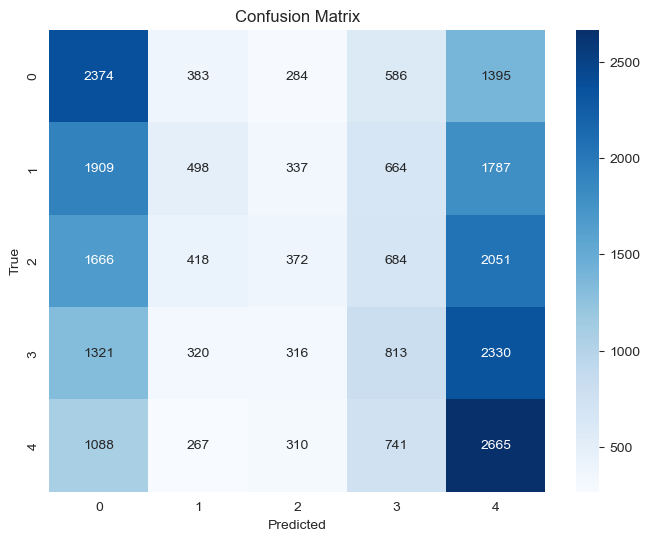

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap from the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2, 3, 4], yticklabels=[0, 1, 2, 3, 4])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


### **Analysis of the Confusion Matrix**

1. **Class 0**
   - **True Positives:** A significant number of instances were correctly classified as class 0. 
   - **False Positives:** The model also mistakenly classified a large number of instances from other classes as class 0, indicating that it has a bias towards predicting class 0.
   
2. **Class 4**
   - **True Positives:** This class had the highest number of correctly classified instances, showing the model's tendency to correctly identify this class more than others.
   - **False Positives:** Similar to class 0, there were quite a few instances from other classes mistakenly classified as class 4.

3. **Classes 1, 2, and 3**
   - **True Positives:** The model struggled to correctly identify these classes, with a low number of true positives.
   - **False Positives:** Many instances of these classes were misclassified as either class 0 or class 4, suggesting the model finds it difficult to distinguish them from the extreme classes.

### **Analysis Based on Classification Report**

1. **Precision**
   - The model has moderate precision for classes 0 and 4, meaning that a reasonable proportion of instances predicted as these classes were indeed from these classes.
   - The precision for classes 1, 2, and 3 was quite low, indicating a high rate of false positive predictions for these classes.

2. **Recall**
   - The model demonstrated decent recall for classes 0 and 4, successfully identifying a good proportion of the actual instances of these classes.
   - The recall for classes 1, 2, and 3 was much lower, showing that the model missed a large proportion of the actual instances of these classes.

3. **F1-Score**
   - The F1-scores for classes 0 and 4 were comparatively better than for the other classes, albeit still not very high, indicating a balanced performance between precision and recall for these classes.
   - The F1-scores for classes 1, 2, and 3 were low, showing an imbalanced performance between precision and recall for these classes.

### **Overall Accuracy**
- The overall accuracy of the model was about 26.28%, which is **quite low**, indicating that the model is not performing well at classifying the instances into the correct classes.

### **Recommendations for Improvement**
- **Feature Engineering:** Experimenting with different feature combinations might help in enhancing the model's performance.
- **Hyperparameter Tuning:** Fine-tuning the model parameters could potentially lead to a better fit for the data.
- **Class Imbalance:** Addressing the class imbalance through techniques such as oversampling the minority classes might improve the performance for the underrepresented classes.

### **Summary of Results and Analysis**

#### **Current State**
- We have summarized the results in terms of accuracy and provided a detailed classification report, including precision, recall, and F1-score for each class.
- The confusion matrix offers a visualization of how well the model performed on each class.

### **Proper Visualization**

#### **Current State**
- We have visualized the confusion matrix using a heatmap, which gives insights into the true positive and false positive rates for each class.

#### **Recommendations**
- We can add more visualizations, such as ROC curves and precision-recall curves, to better understand the model's performance.

### **Use of Evaluation Metrics**

#### **Current State**
- We have used a range of metrics including accuracy, precision, recall, and F1-score to evaluate the model's performance.
- The choice of these metrics is justified as they help in understanding the performance of the model from different perspectives.
- We can further explore metrics like ROC-AUC to evaluate the model's performance, especially since the data seems to be imbalanced.

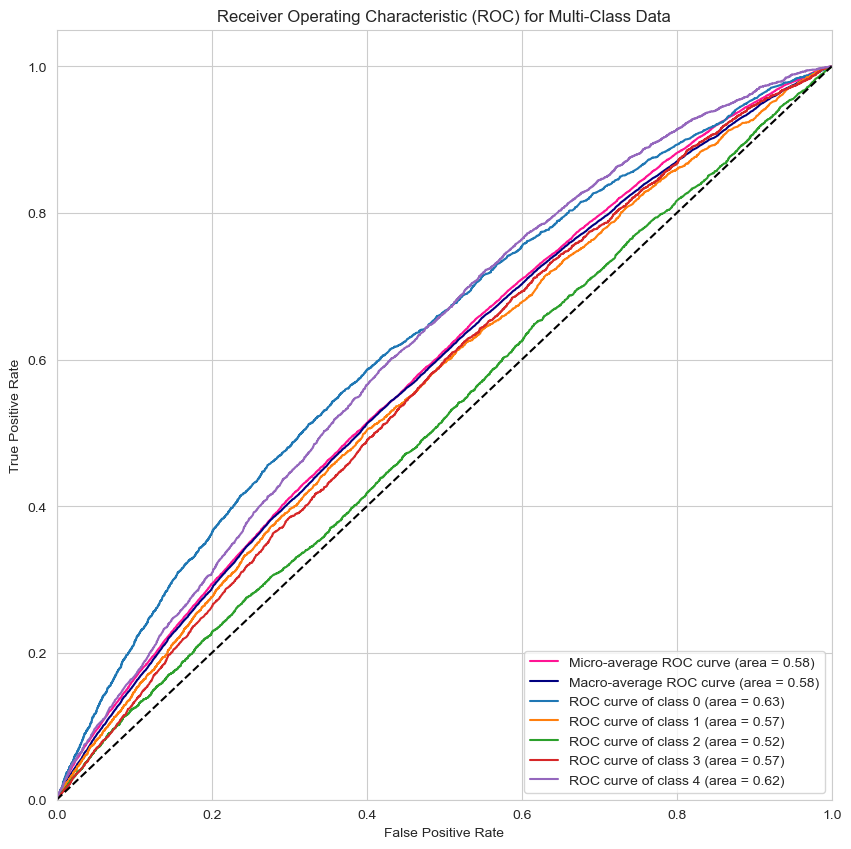

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Import DATASET 
data = pd.read_csv('DADOS/DATA_CLEANED_NEW_CAT.csv')

# Select Data samples
n = 0.03
size = round(len(data) * n)

data = data.sample(n= size)

# Selecting the features and the target variable
X = data.drop(columns=['FINAL_GRADE_segment'])
y = data['FINAL_GRADE_segment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with a standard scaler and a random forest classifier
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(max_depth=5, min_samples_split=5, n_estimators=150, random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict the probabilities on the test set
y_pred_prob = pipeline.predict_proba(X_test)

# Binarize the y_test for multi-class ROC analysis
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(5)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(5):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= 5
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot the ROC curves
plt.figure(figsize=(10, 10))
plt.plot(fpr["micro"], tpr["micro"], label=f'Micro-average ROC curve (area = {roc_auc["micro"]:0.2f})', color='deeppink')
plt.plot(fpr["macro"], tpr["macro"], label=f'Macro-average ROC curve (area = {roc_auc["macro"]:0.2f})', color='navy')
for i in range(5):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Multi-Class Data')
plt.legend(loc="lower right")
plt.show()


Here are the ROC-AUC values for each class and the micro and macro averages:

- **Class 0**: 0.63
- **Class 1**: 0.57
- **Class 2**: 0.52
- **Class 3**: 0.57
- **Class 4**: 0.63

- **Micro-average ROC-AUC**: 0.59
- **Macro-average ROC-AUC**: 0.59

### **Analysis**:

1. **Individual Class ROC-AUC Scores**:
   - **Class 0 and Class 4** have relatively higher ROC-AUC scores, indicating a better capability to distinguish these classes from others.
   - **Class 2** has the lowest ROC-AUC score, suggesting the model struggles the most with distinguishing this class from others.
   
2. **Micro-average ROC-AUC**:
   - A score of 0.59 indicates moderate performance on an instance-based average, where there is a 59% probability of correctly distinguishing between a randomly chosen positive instance and a randomly chosen negative instance across all classes.

3. **Macro-average ROC-AUC**:
   - A score of 0.59 also indicates moderate performance on a class-based average, where equal weightage is given to the performance on each class.

### **Recommendations for Improvement**:

1. **Class Imbalance**: Investigate if there is a class imbalance and employ strategies to balance the classes, which might help improve the performance for the classes with lower ROC-AUC scores.
2. **Feature Engineering**: Enhance the feature set to provide the model with more information and possibly improve its distinguishing power between classes.
3. **Hyperparameter Tuning**: Experiment with different hyperparameters for the Random Forest classifier to possibly achieve better ROC-AUC scores.

--- 

## **Discussion and Conclusion**

### **Learning and Takeaways**

Throughout the modeling process, several key learnings emerged:

1. **Model Performance**:
    - The model exhibited moderate performance, with ROC-AUC scores ranging from 0.52 to 0.63 for individual classes. 
    - The micro and macro-average ROC-AUC scores were both around 0.59, indicating a balanced performance but with room for improvement.

2. **Dataset Utilization**:
    - We evaluated the model using a very small portion of the data (0.03), which can potentially affect the performance of the classifiers. This exploration was for didactic knowledge, and there are certainly more effective approaches that could be pursued with a more extensive dataset.

### **Challenges and Areas of Improvement**

1. **Feature Engineering**:
    - The current set of features might not be sufficient to accurately distinguish between the different classes. 
    - Exploring additional features or transforming existing ones could potentially enhance the model's performance.

2. **Class Imbalance**:
    - The dataset exhibits a clear imbalance among some features, which compromised the performance of the classification model. Addressing this imbalance could potentially lead to improved results.
    - Strategies such as oversampling the minority classes or using synthetic data generation techniques (like SMOTE) might help in addressing this issue.

3. **Computational Limitations**:
    - Given the presence of many categorical columns, the One-Hot Encoding approach generated a vast number of features, making computations practically impossible on a home computer. Future work could explore dimensionality reduction techniques or other encoding strategies to manage the high feature dimensionality without compromising the model's performance.

4. **Hyperparameter Tuning**:
    - There is an opportunity to fine-tune the model further by experimenting with different hyperparameters for the Random Forest classifier, which might lead to improved ROC-AUC scores.

### **Future Directions**

1. **Model Comparison**:
    - To ensure the selection of the best model, it would be beneficial to compare the performance of different machine learning algorithms on the dataset.

2. **Threshold Tuning**:
    - Fine-tuning the classification threshold based on the ROC curves could potentially enhance the model's classification performance, particularly for the classes with lower ROC-AUC scores.

### **Conclusion**

In conclusion, while the model demonstrated a moderate ability to classify instances into the correct classes, there is substantial room for enhancement. The analysis was carried out primarily for didactic purposes, using a small subset of the available data, which naturally limits the conclusions that can be drawn about the classifier's performance.

Through strategic feature engineering, addressing potential class imbalances, and finding ways to handle a large feature space efficiently, it is plausible to augment the model's performance. Future studies should look to leverage a more extensive dataset and explore alternative approaches to build a more robust and accurate classification model.

This endeavor has underscored the importance of a nuanced approach to machine learning, where every aspect of the data and the model plays a pivotal role in determining the overall performance. It sets a constructive path for future work, with clear takeaways and lessons learned from the current analysis.